Authors: Szymon, Wojciech

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.linear_model import LogisticRegression
from numpy.lib.arraypad import pad
from mlxtend.plotting import plot_decision_regions
from sklearn import neighbors
from sklearn.base import clone
from itertools import combinations
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from copy import deepcopy
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import balanced_accuracy_score

In [ ]:
#load the data from .csv file
data = pd.read_csv("/content/drive/MyDrive/TrainingData.csv",",")

data = data.drop("Id", axis = 1)
data = data.drop("CITY", axis=1)
data = data.drop("Profession", axis=1)
data = data.drop("STATE", axis=1)

#x_data = data.iloc[:,[1,2,3,4,5,6,10,11]].values
#y_data = data.iloc[:,-1].values

In [ ]:
data.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1


In [ ]:
data.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
data = pd.get_dummies(data, columns = ['Married/Single','House_Ownership','Car_Ownership'])
print(data)

         Income  Age  ...  Car_Ownership_no  Car_Ownership_yes
0       1303834   23  ...                 1                  0
1       7574516   40  ...                 1                  0
2       3991815   66  ...                 1                  0
3       6256451   41  ...                 0                  1
4       5768871   47  ...                 1                  0
...         ...  ...  ...               ...                ...
251995  8154883   43  ...                 1                  0
251996  2843572   26  ...                 1                  0
251997  4522448   46  ...                 1                  0
251998  6507128   45  ...                 1                  0
251999  9070230   70  ...                 1                  0

[252000 rows x 13 columns]


In [ ]:
data = data.drop("Married/Single_married", axis=1)
data = data.drop("House_Ownership_norent_noown", axis=1)
data = data.drop("Car_Ownership_no", axis=1)

In [ ]:
data.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,3,13,0,1,0,1,0
1,7574516,40,10,9,13,0,1,0,1,0
2,3991815,66,4,4,10,0,0,0,1,0
3,6256451,41,2,2,12,1,1,0,1,1
4,5768871,47,11,3,14,1,1,0,1,0


In [ ]:
data

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes
0,1303834,23,3,3,13,0,1,0,1,0
1,7574516,40,10,9,13,0,1,0,1,0
2,3991815,66,4,4,10,0,0,0,1,0
3,6256451,41,2,2,12,1,1,0,1,1
4,5768871,47,11,3,14,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,0,1,0
251996,2843572,26,10,6,11,0,1,0,1,0
251997,4522448,46,7,7,12,0,1,0,1,0
251998,6507128,45,0,0,10,0,1,0,1,0


In [ ]:
y_data = data["Risk_Flag"].values
x_data = data.drop("Risk_Flag",axis = 1).values

In [ ]:
Y_data=pd.DataFrame(y_data)

In [ ]:
#split data into train and test samples (ratio 80:20)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data)

**Balansujemy dane do naszych klasyfikacji**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over_sampler = RandomOverSampler(random_state=42)
x_res, y_res = over_sampler.fit_resample(x_train, y_train)
x_res_t, y_res_t = over_sampler.fit_resample(x_test, y_test)

In [ ]:
#normalize the data
mms = MinMaxScaler()
x_train_norm = mms.fit_transform(x_res)
x_test_norm = mms.transform(x_res_t)

#standarize the data
stdsc = StandardScaler()
x_train_std = stdsc.fit_transform(x_res)
x_test_std = stdsc.transform(x_res_t)

 1) Income                         0.379574
 2) Age                            0.262252
 3) Experience                     0.115521
 4) CURRENT_JOB_YRS                0.106162
 5) CURRENT_HOUSE_YRS              0.092733
 6) House_Ownership_rented         0.019813
 7) Risk_Flag                      0.012294
 8) House_Ownership_owned          0.007773
 9) Married/Single_single          0.003877


(-1.0, 9.0)

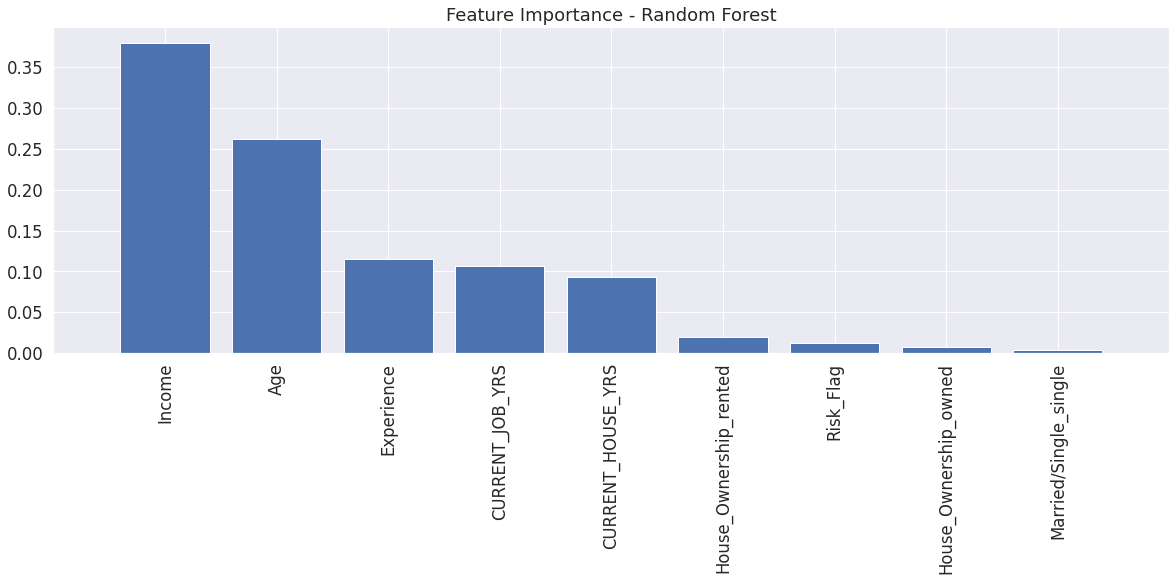

In [ ]:
#Random Forest
feat_labels = data.columns[0:]
#print(feat_labels)
forest = RandomForestClassifier(n_estimators=50, random_state=1)
forest.fit(x_res,y_res)
importances = forest.feature_importances_
#print(importances)
indices = np.argsort(importances)[::-1]
#print(indices)
for f in range(x_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
  feat_labels[indices[f]],
  importances[indices[f]]))
figure(num=1, figsize=(20, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(x_train.shape[1]), importances[indices], align='center')
plt.xticks(range(x_train.shape[1]),
           feat_labels[indices], rotation=90)
plt.xlim([-1,x_train.shape[1]])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


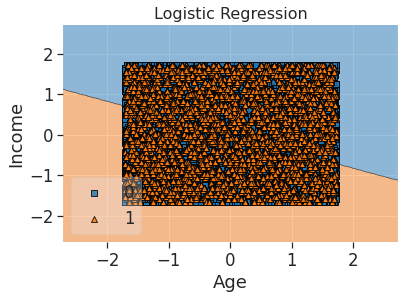

In [ ]:
x_2d_test_data_std = x_test_std[:,[0,1]]
lr = LogisticRegression(C=50, max_iter=1000, class_weight='balanced')
lr.fit(X=x_2d_test_data_std,
        y=y_res_t)
plot_decision_regions(x_2d_test_data_std,
                      y_res_t,
                      clf=lr,
                      legend=3)
plt.title('Logistic Regression', size=16)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

In [ ]:
from sklearn.metrics import f1_score

0.5175529517800811


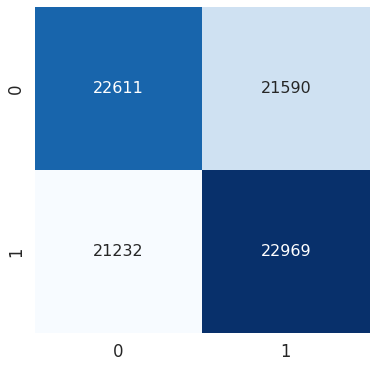

In [ ]:
import seaborn as sns
x_2d_test_to_predict=x_test_std[:,[0,1]]
pred_test = lr.predict(x_2d_test_to_predict)
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Calling function
conf_matrix(y_res_t, pred_test)

train_score = f1_score(y_res_t, pred_test)
print(train_score)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


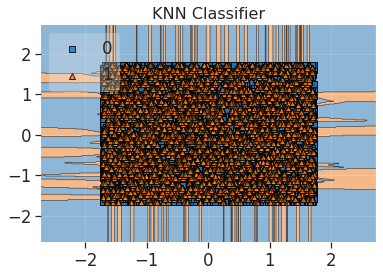

In [ ]:
x_2d_test_dt_std = x_test_std[:,[0,1]]
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=x_2d_test_dt_std,
        y=y_res_t)
plot_decision_regions(x_2d_test_dt_std,
                      y_res_t,
                      clf=knn,
                      legend=2)
plt.title('KNN Classifier', size=16)
plt.show()

Test accuracy:
0.8782161234991425


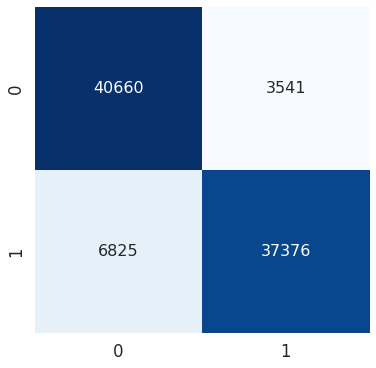

In [ ]:
x_2d_test_to_predict=x_test_std[:,[0,1]]
pred_test = knn.predict(x_2d_test_to_predict)
# Function to create a confusion matrix
def conf_matrix(y_test, pred_test):

    # Creating a confusion matrix
    con_mat = confusion_matrix(y_test, pred_test)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))

    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5)
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

#Calling function
conf_matrix(y_res_t, pred_test)

train_score = f1_score(y_res_t, pred_test)
print('Test accuracy:')
print(train_score)

Train accuracy:
0.7398497021973096


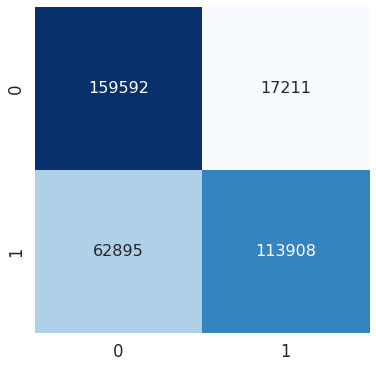

In [ ]:
x_2d_test_to_predict=x_train_std[:,[0,1]]
pred_test = knn.predict(x_2d_test_to_predict)

#Calling function
conf_matrix(y_res, pred_test)

train_score = f1_score(y_res, pred_test)
print('Train accuracy:')
print(train_score)

In [ ]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=100,
                              random_state=1, class_weight='balanced')
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train_std)
X_test2 = pca.fit_transform(x_test_std)
tree.fit(X_train2, y_res)
#plot_decision_regions(X_train2, y_res, clf=tree, legend=2)

#plt.xlabel('GS1', size=14)
#plt.ylabel('GS2', size=14)
#plt.title('Desion Tree Region Boundary', size=16)

DecisionTreeClassifier(class_weight='balanced', max_depth=100, random_state=1)

Train accuracy:
0.9591630251097892


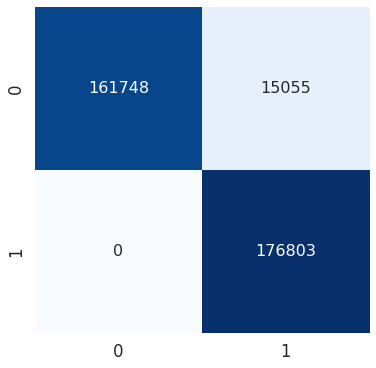

In [ ]:
x_2d_test_to_predict=x_train_std[:,[0,1]]
pred_test = tree.predict(X_train2)

#Calling function
conf_matrix(y_res, pred_test)

train_score = f1_score(y_res, pred_test)
print('Train accuracy:')
print(train_score)

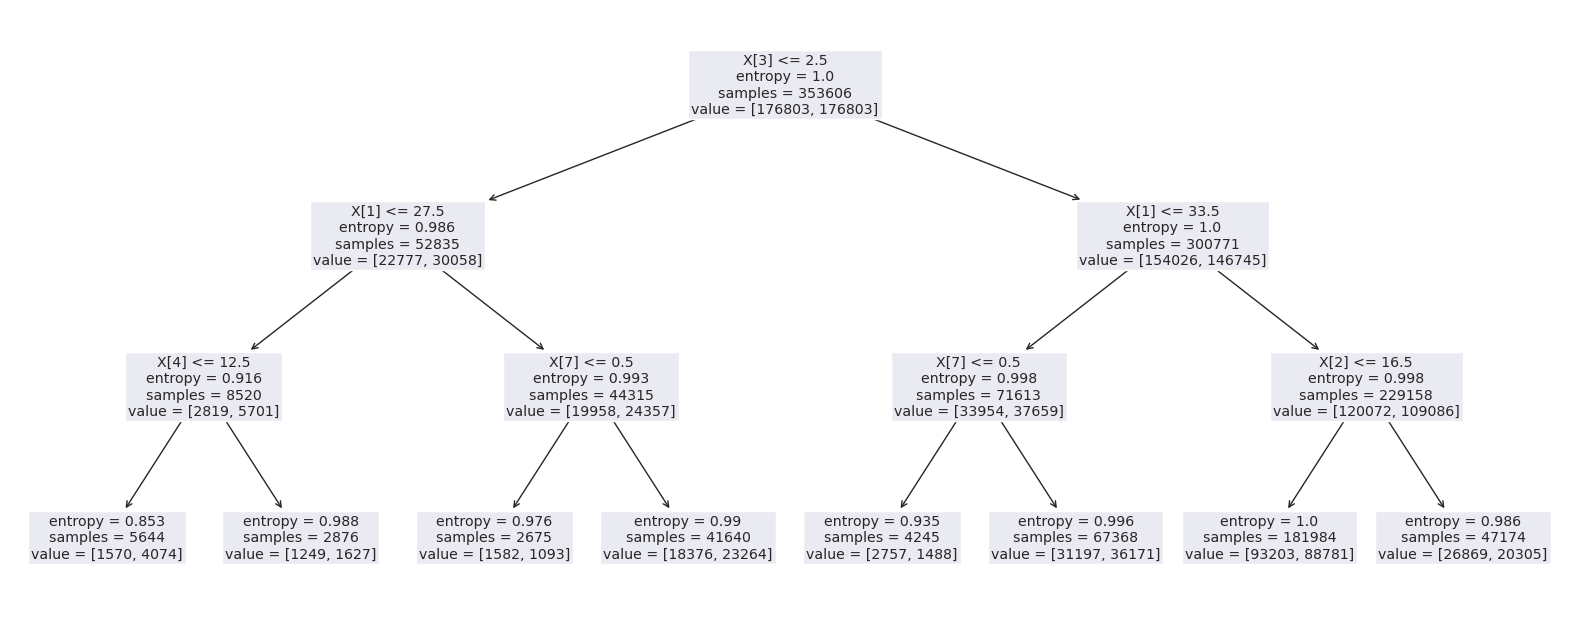

In [ ]:
from sklearn import tree

model=tree.DecisionTreeClassifier(max_depth=3,criterion='entropy', class_weight='balanced')
model.fit(x_res,y_res)
figure(figsize=(20, 8), dpi=100)
tree.plot_tree(model)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


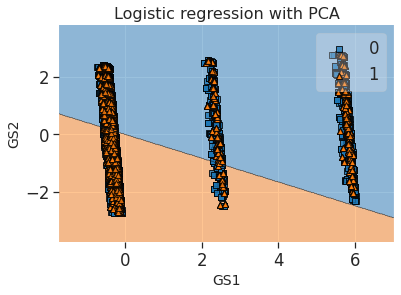

In [ ]:
plot_decision_regions(X_test2, y_res_t, clf=lr)
plt.xlabel('GS1', size=14)
plt.ylabel('GS2', size=14)
plt.title('Logistic regression with PCA', size=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


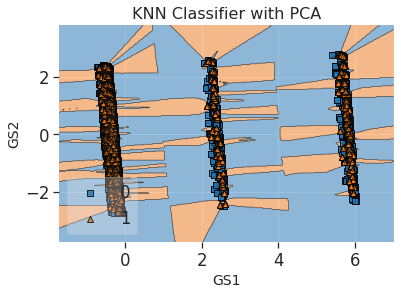

In [ ]:
x_2d_test_dt_std = X_test2
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X=x_2d_test_dt_std,
        y=y_res_t)
plot_decision_regions(x_2d_test_dt_std,
                      y_res_t,
                      clf=knn,
                      legend=3)
plt.xlabel('GS1', size=14)
plt.ylabel('GS2', size=14)
plt.title('KNN Classifier with PCA', size=16)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
import sys
import random

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


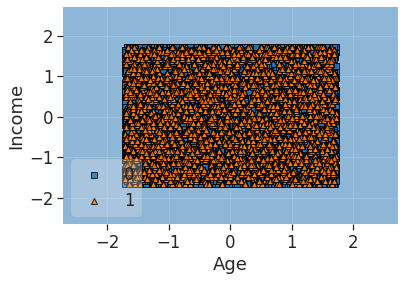

In [ ]:
x_2d_test_perc_std = x_test_std[:,[0,1]]
perc_2d = Perceptron(eta0=0.01,penalty='l1',tol=0.001)
perc_2d.fit(x_2d_test_perc_std,y_res_t)
plot_decision_regions(x_2d_test_perc_std, y_res_t, clf=perc_2d, legend=3)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:242: UserWarning: No contour levels were found within the data range.
  antialiased=True)
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


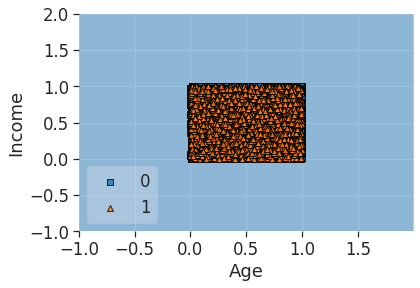

In [ ]:
x_2d_test_perc_norm = x_test_norm[:,[0,1]]
perc_2d = Perceptron(eta0=0.1,penalty='l1',tol=0.0001, class_weight='balanced')
perc_2d.fit(x_2d_test_perc_norm,y_res_t)
plot_decision_regions(x_2d_test_perc_norm, y_res_t, clf=perc_2d, legend=3)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


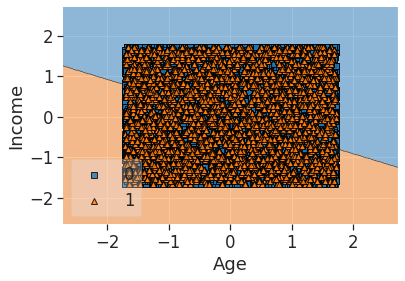

In [ ]:
from numpy.lib.arraypad import pad
from sklearn.neural_network import MLPClassifier

x_2d_test_mlp_std = x_test_std[:,[0,1]]
mlp_2d = MLPClassifier(activation='logistic',
                        alpha=0.01,
                        hidden_layer_sizes=(64),
                        max_iter=150,
                        solver='lbfgs')
mlp_2d.fit(X=x_2d_test_mlp_std,
           y=y_res_t)
plot_decision_regions(x_2d_test_mlp_std,
                      y_res_t,
                      clf=mlp_2d,
                      legend=3)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


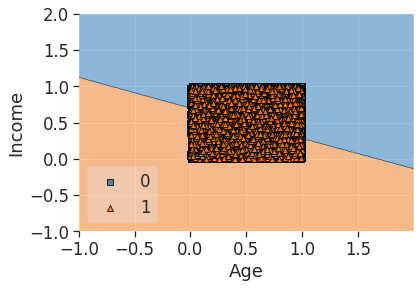

In [ ]:
x_2d_test_mlp_norm = x_test_norm[:,[0,1]]
mlp_2d = MLPClassifier(activation='logistic',
                        alpha=0.01,
                        hidden_layer_sizes=(64),
                        max_iter=200,
                        solver='lbfgs')
mlp_2d.fit(X=x_2d_test_mlp_norm,
           y=y_res_t)
plot_decision_regions(x_2d_test_mlp_norm,
                      y_res_t,
                      clf=mlp_2d,
                      legend=3)
plt.ylabel('Income')
plt.xlabel('Age')
plt.show()

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
clf = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    use_label_encoder=False,
                    random_state=42)

clf.fit(x_res, y_res, eval_metric='logloss')
predictions = clf.predict(x_res_t)
print("accuracy_score: " + str(accuracy_score(y_res_t, predictions)))

accuracy_score: 0.7445306667269971


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=1,
                              random_state=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=50,
                         learning_rate=0.1,
                         random_state=1)

In [ ]:
tree = tree.fit(x_train, y_train)
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(x_train, y_train)
y_train_pred = ada.predict(x_train)
y_test_pred = ada.predict(x_test)

ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.925/0.880
AdaBoost train/test accuracies 0.877/0.877
